In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/700_2geopot')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-26 14:08:31 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [3]:
dataset = dataset.z.resample(time='1D').interpolate('linear')
dataset

<xarray.DataArray 'z' (time: 5936, latitude: 101, longitude: 181)>
array([[[30042.55664062, 30048.27929688, 30053.6640625 , ...,
         30097.4140625 , 30082.79296875, 30066.52734375],
        [30072.81835938, 30079.16601562, 30085.171875  , ...,
         30106.53710938, 30091.40625   , 30074.57421875],
        [30103.0234375 , 30108.06835938, 30112.31835938, ...,
         30114.52929688, 30100.70117188, 30085.56835938],
        ...,
        [30749.18945312, 30745.67578125, 30742.56054688, ...,
         30491.67578125, 30483.68554688, 30477.90429688],
        [30753.66796875, 30751.28710938, 30748.56640625, ...,
         30507.54296875, 30501.8203125 , 30497.28710938],
        [30758.54101562, 30755.65039062, 30753.328125  , ...,
         30525.0546875 , 30519.4453125 , 30516.95117188]],

       [[29910.90820312, 29916.40625   , 29921.67578125, ...,
         30233.02734375, 30223.56445312, 30215.80078125],
        [29949.04882812, 29956.52929688, 29964.1796875 , ...,
         30243.68164062, 30234.4453125 , 30225.546875  ],
        [29986.67773438, 29993.02539062, 29999.54296875, ...,
         30254.7890625 , 30246.0625    , 30237.7890625 ],
...
        [30485.328125  , 30483.34570312, 30481.58789062, ...,
         30572.09179688, 30590.56640625, 30605.5859375 ],
        [30492.29882812, 30490.82617188, 30489.578125  , ...,
         30579.0625    , 30597.8203125 , 30612.1015625 ],
        [30497.85351562, 30496.32226562, 30495.8125    , ...,
         30587.84765625, 30604.84765625, 30620.60351562]],

       [[30578.04296875, 30574.30273438, 30569.76953125, ...,
         30717.05664062, 30715.30078125, 30713.03320312],
        [30580.02734375, 30576.5703125 , 30572.77148438, ...,
         30716.3203125 , 30715.81054688, 30714.56445312],
        [30579.2890625 , 30574.30273438, 30569.54296875, ...,
         30714.56445312, 30714.79101562, 30714.56445312],
        ...,
        [30414.03515625, 30417.54882812, 30420.26953125, ...,
         30934.5625    , 30948.78710938, 30961.02734375],
        [30425.82421875, 30430.30078125, 30433.81445312, ...,
         30937.0546875 , 30953.546875  , 30965.78710938],
        [30437.5546875 , 30440.78515625, 30444.52539062, ...,
         30940.79492188, 30956.77734375, 30971.28515625]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [4]:
t = dataset.sel(time=slice('2013-7-4', '2013-7-9'))
t

<xarray.DataArray 'z' (time: 6, latitude: 101, longitude: 181)>
array([[[29584.765625  , 29592.98242188, 29599.7265625 , ...,
         29439.23242188, 29435.71875   , 29433.2265625 ],
        [29631.74609375, 29639.50976562, 29646.48046875, ...,
         29449.71679688, 29448.01757812, 29446.48632812],
        [29678.7265625 , 29685.24414062, 29692.21484375, ...,
         29462.015625  , 29461.22265625, 29460.484375  ],
        ...,
        [30239.99804688, 30231.49804688, 30223.734375  , ...,
         30822.01367188, 30823.71289062, 30823.99609375],
        [30250.765625  , 30246.00585938, 30242.71875   , ...,
         30819.97265625, 30822.9765625 , 30822.9765625 ],
        [30259.72070312, 30255.47070312, 30252.01367188, ...,
         30819.51953125, 30820.48242188, 30821.72851562]],

       [[29819.66796875, 29816.94726562, 29814.16992188, ...,
         29735.68164062, 29717.43359375, 29698.44726562],
        [29853.66992188, 29852.70703125, 29851.4609375 , ...,
         29750.69921875, 29731.203125  , 29710.46289062],
        [29887.95703125, 29885.68945312, 29883.93359375, ...,
         29762.203125  , 29742.42382812, 29721.45703125],
...
        [30288.84960938, 30289.1328125 , 30288.84960938, ...,
         31009.140625  , 31018.88867188, 31024.89648438],
        [30291.85351562, 30293.09960938, 30293.3828125 , ...,
         31008.63085938, 31017.86914062, 31022.11914062],
        [30295.140625  , 30296.10351562, 30297.34960938, ...,
         31008.63085938, 31015.1484375 , 31019.8515625 ]],

       [[30148.64453125, 30147.625     , 30145.35742188, ...,
         30093.10742188, 30089.65039062, 30085.3984375 ],
        [30154.87890625, 30153.85742188, 30150.85546875, ...,
         30108.63476562, 30106.3671875 , 30102.85351562],
        [30157.14453125, 30153.63085938, 30148.13476562, ...,
         30125.63671875, 30125.125     , 30123.65234375],
        ...,
        [30182.87304688, 30186.61328125, 30190.86523438, ...,
         30797.36132812, 30797.36132812, 30794.8671875 ],
        [30188.37109375, 30194.37890625, 30199.6484375 , ...,
         30796.11328125, 30796.625     , 30795.15039062],
        [30194.37890625, 30200.89453125, 30207.63867188, ...,
         30795.88671875, 30795.60351562, 30796.11328125]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

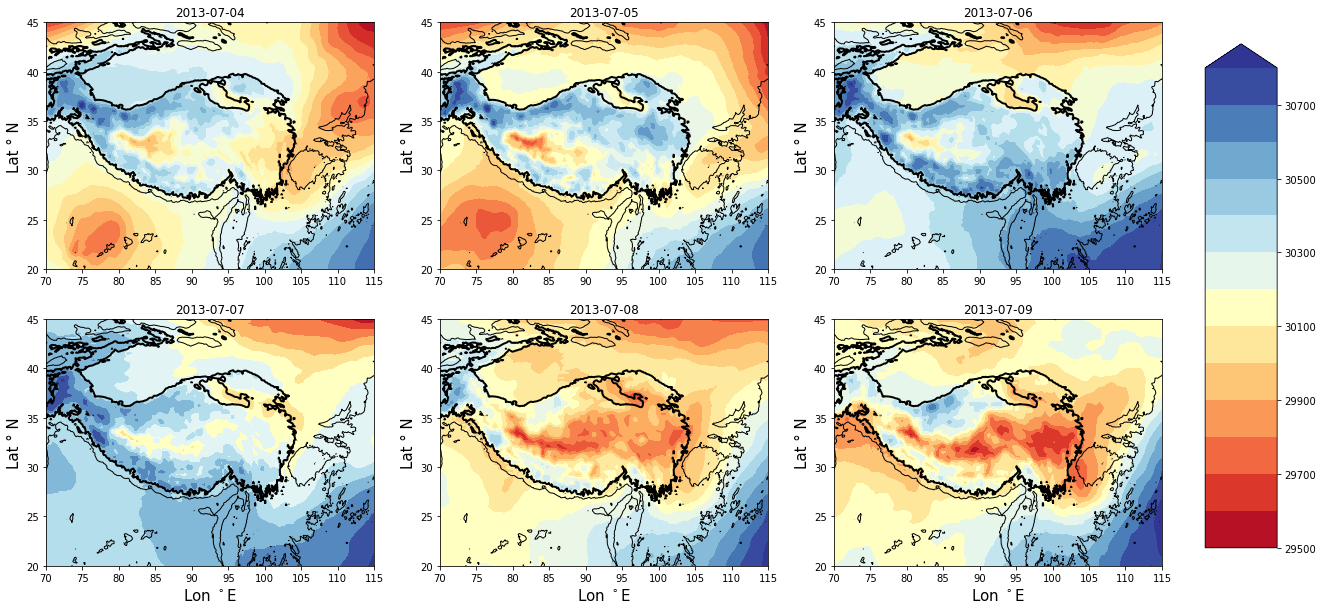

In [7]:
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

cmap = plt.cm.RdYlBu
levels = 15

m=ax1.contourf(t.longitude,t.latitude,t[0], cmap=cmap, levels=levels, extend='max')
m=ax2.contourf(t.longitude,t.latitude,t[1], cmap=cmap, levels=levels, extend='max')
m=ax3.contourf(t.longitude,t.latitude,t[2], cmap=cmap, levels=levels, extend='max')
m=ax4.contourf(t.longitude,t.latitude,t[3], cmap=cmap, levels=levels, extend='max')
m=ax5.contourf(t.longitude,t.latitude,t[4], cmap=cmap, levels=levels, extend='max')
m=ax6.contourf(t.longitude,t.latitude,t[5], cmap=cmap, levels=levels, extend='max')
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
fig.colorbar(m,cax=cbar_ax)
ax1.set_title(str(t.time.values[0])[0:10])
ax2.set_title(str(t.time.values[1])[0:10])
ax3.set_title(str(t.time.values[2])[0:10])
ax4.set_title(str(t.time.values[3])[0:10])
ax5.set_title(str(t.time.values[4])[0:10])
ax6.set_title(str(t.time.values[5])[0:10])
ax1.set_ylabel('Lat ° N',  fontsize=15)
ax2.set_ylabel('Lat ° N',  fontsize=15)
ax3.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)
ax5.set_ylabel('Lat ° N',  fontsize=15)
ax6.set_ylabel('Lat ° N',  fontsize=15)

ax4.set_xlabel('Lon $^\circ$E',  fontsize=15)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')